<a href="https://colab.research.google.com/github/Vreddy0305/Machine-Learning-ML-/blob/main/Lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0.16280349060772228
0.03751214641727829
Reservoir_Storage_acre_ft
0    0
1    0
2    0
3    0
4    0
Name: Gage_Height_ft, dtype: category
Categories (3, int64): [0 < 1 < 2]
0    0
1    0
2    0
3    0
4    0
Name: Gage_Height_ft, dtype: category
Categories (3, int64): [0 < 1 < 2]
Decision Tree built


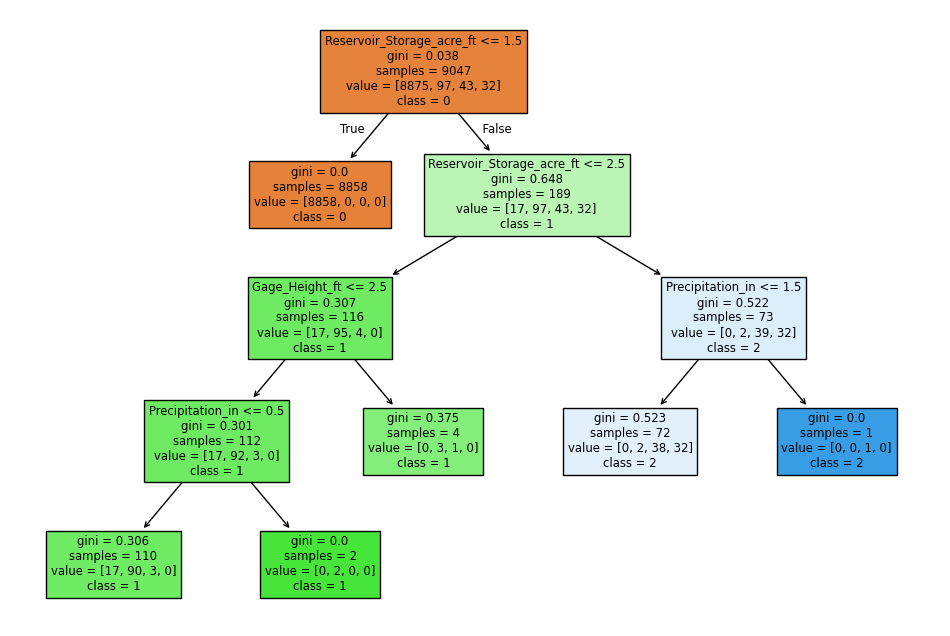

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


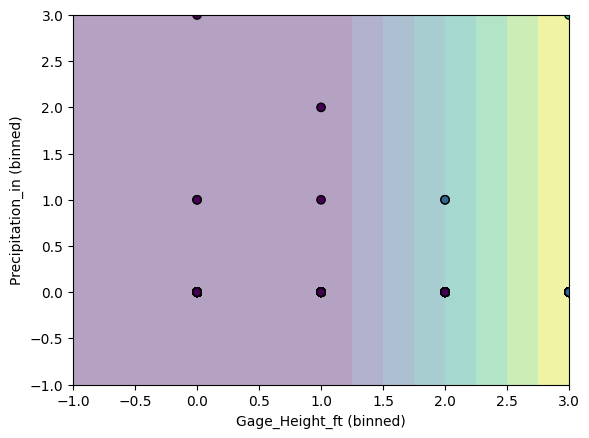

In [2]:
# A1
import pandas as pd
import numpy as np

data = pd.read_csv("/content/merged_clean_dataset (1).csv")
y = data['Stream_Flow_cfs']

bins = pd.cut(y, 4, labels=[0,1,2,3])
y_binned = bins.astype(int)

def entropy(values):
    probs = values.value_counts(normalize=True)
    return -sum(probs * np.log2(probs))

print(entropy(y_binned))

# A2
def gini(values):
    probs = values.value_counts(normalize=True)
    return 1 - sum(probs**2)

print(gini(y_binned))

# A3
X = data[['Gage_Height_ft','Precipitation_in','Reservoir_Storage_acre_ft']]

def information_gain(feature, target):
    total_entropy = entropy(target)
    values = feature.unique()
    weighted_entropy = 0
    for v in values:
        subset = target[feature == v]
        weighted_entropy += len(subset)/len(feature) * entropy(subset)
    return total_entropy - weighted_entropy

best_feature = None
best_ig = -1
for col in X.columns:
    binned = pd.cut(X[col], 4, labels=[0,1,2,3])
    ig = information_gain(binned, y_binned)
    if ig > best_ig:
        best_ig = ig
        best_feature = col
print(best_feature)

# A4
def bin_feature(values, bins=4, method="equal_width"):
    if method=="equal_width":
        return pd.cut(values, bins, labels=range(bins))
    else:
        return pd.qcut(values, bins, labels=range(bins))

print(bin_feature(data['Gage_Height_ft'], 3, "equal_width").head())
print(bin_feature(data['Gage_Height_ft'], 3, "frequency").head())

# A5
from sklearn.tree import DecisionTreeClassifier

X = data[['Gage_Height_ft','Precipitation_in','Reservoir_Storage_acre_ft']]
X_binned = X.apply(lambda col: pd.cut(col, 4, labels=[0,1,2,3]))
clf = DecisionTreeClassifier()
clf.fit(X_binned, y_binned)

print("Decision Tree built")

# A6
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plot_tree(clf, feature_names=X.columns, class_names=["0","1","2","3"], filled=True)
plt.show()

# A7
from sklearn import tree
import numpy as np
import matplotlib.pyplot as plt

X = data[['Gage_Height_ft','Precipitation_in']]
X_binned = X.apply(lambda col: pd.cut(col, 4, labels=[0,1,2,3]))

# Drop rows with NaN values in X_binned before converting to int
X_binned = X_binned.dropna()
y_binned_subset = y_binned.loc[X_binned.index]

clf = DecisionTreeClassifier().fit(X_binned, y_binned_subset)

x_min, x_max = X_binned['Gage_Height_ft'].astype(int).min()-1, X_binned['Gage_Height_ft'].astype(int).max()+1
y_min, y_max = X_binned['Precipitation_in'].astype(int).min()-1, X_binned['Precipitation_in'].astype(int).max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 1), np.arange(y_min, y_max, 1))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_binned['Gage_Height_ft'].astype(int), X_binned['Precipitation_in'].astype(int), c=y_binned_subset, edgecolor='k')
plt.xlabel("Gage_Height_ft (binned)")
plt.ylabel("Precipitation_in (binned)")
plt.show()